# Binomial Distributions

As the prefix *bi-* implies, the Binomial Probability distribution describes a situation with two possible outcomes - often times described as 'success' or 'failure'.

In particular, this distribution describes the probability of specific types of experiments called a sequence of **Bernoulli trials**. Such a sequence satisfies

*   There are a fixed, $n$, number of trials
*   There are exactly two possibile  outcomes - often times described as 'success' or 'failure'.
*   Each trial is independent (i.e. does not depend on outcomes of previous trials)
*   The probability of success, $p$, is the same for each trial


Some examples satifiying these requirements include: flipping a coin 5 times to see how many heads occur, having 6 children to see how many girls are born, or passing or failing an exam.

## Binomial Empirical Distribution

Let's again consider our six-sided die for a different experiment! Suppose we are interested in rolling a die and getting an even number. We want to know what happens if we repeat this trial 10 times, what is the probability of our number of successes - number of evens- to be 1 success, 2 successes, 3 successes...? 
This example is indeed a sequence of Bernoulli trials as there are a fixed $n=10$ number of trials, there are exactly two outcomes: evens - 'success' and odds - 'failure', each trail is independent, and the probability of success is $p=0.5$.
To determine what this distribution looks like through observation, we would repeat this experiment 100, 1000 or more times to get an empirical distribution.

Recall in the (section on iteration and conditionals?) we experimented with a parity function and finding the number of even dice rolls when rolling a six-sided die.
Below we'll redefine the six-sided die and re-run our simulation from XYZ section with experiments of size 10, 100, and 1000.

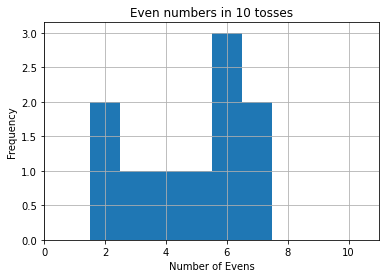

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

die = np.arange(1, 7)

def parity(input_integer): 
    if (input_integer % 2) == 0:
        return "even"
    else:
        return "odd"

vec_parity = np.vectorize(parity) 

np.random.seed(1234)

def parity_experiment(num_experiments):
  total_evens = np.empty(0)
  for i in np.arange(num_experiments): 
      choices = np.random.choice(die, 10)
      labels = vec_parity(choices)
      
      total_evens = np.append(total_evens, sum(labels == 'even'))

  legend = f'Even numbers in {num_experiments:,} tosses'

  pd.DataFrame({legend: total_evens}).hist(bins=np.arange(.5, 11));
  plt.xlabel('Number of Evens')
  plt.ylabel("Frequency");

parity_experiment(10)

This histogram records the observed number of evens when rolling a die 10 times with this experiment repeated num_experiment=10 times. For example, there were 2 evens recorded from 2 experiments, 3 evens recorded from 1 experiment, 6 evens recorded from 3 experiments etc.
The empirical probability of 6 evens rolled out of 10 is $3/10=0.3$.

We repeat the experiment below by changing the num_experiments to 100 and then 1000 to see the resulting empirical distribution.

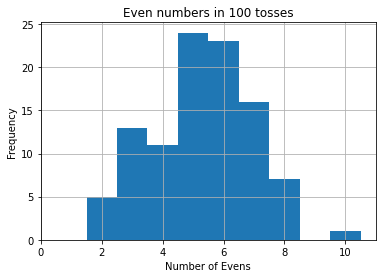

In [ ]:
np.random.seed(1234)
parity_experiment(100)

Above the empirical probability of 6 even numbers rolled out of 10 is $23/100 = 0.23$.

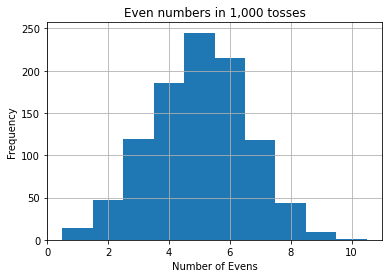

In [ ]:
parity_experiment(1000)

And above the observed probability that 6 even numbers were rolled in 10 tosses of the die is $218/1000 = 0.218$.

## Binomial Probability Distribution
For the event that we just simulated, we have the ability to calculate the probabilities for each event in the sample space.
In particular, we can assign probabilites corresponding to the number of successes. For a trial of $n$ experiments, we are interested in the probability of exactly $j$ successes, where $1 \leq j \leq n$. 
Given a sequence of Bernoulli trials, we define a random variable $X$ that records the number of successes. The discrete distribution function for $X$ is called the Binomial Probability Distribution and its pmf is given by $P(X=j) = b(n,p,j) = {n \choose j} p^j (1-p)^{n-j}.$

To dissect this formula, we first expand on the notation ${n \choose j}$, read "n choose j". In general, for non-negative numbers $n$ and $j$ with $0 \leq j \leq n$, ${n \choose j}$ counts the number of ways to choose $j$ objects from a set of $n$ while ignoring the order. Mathematically, we have ${n \choose j} = \frac{n!}{j!(n-j)!} = \frac{n(n-1)(n-2)\cdot \cdot \cdot (n-(j-1))(n-j)!}{j! (n-j)!} = \frac{n(n-1)(n-2)\cdot \cdot \cdot (n-(j-1))}{j!},$ which says we have $n$ ways to choose the first element from a set of $n$ objects, $n-1$ ways to choose the second element from the remaining $n-1$ elements all the way up to $n-(j+1)$ ways to choose the $j^{th}$ element. But because order does not matter, that is the first element choosen is no different than the third, we have overcounted! There are $j!$ ways of ordering the $j$ chosen elements, so dividing by $j!$ gives us the number of subsets of size $j$ from an $n$ element set. The table below gives examples of how to calculate ${n \choose j}$. Notice the pattern in results. The number of ways to choose 2 elements from a set of 10 is the same as the number of ways to 8 elements (and therefore not chooose 2 elements) from a set of 10.

| ${n \choose j}$  | $\frac{n!}{j!(n-j)!}$ | Number of ways to choose j elements from a set of n |
| ---------------- | ------------------ |------------------ |
| ${10 \choose 0}$     | $\frac{10*9*8*7*6*5*4*3*2*1}{0!(10*9*8*7*6*5*4*3*2*1)}$ |  $=1$|
| ${10 \choose 1}$     | $\frac{10*9*8*7*6*5*4*3*2*1}{1!(9*8*7*6*5*4*3*2*1)}$ |  $=10$|
| ${10 \choose 2}$   |$\frac{10*9*8*7*6*5*4*3*2*1}{(2*1)(8*7*6*5*4*3*2*1}$  | $=45$ |
| ${10 \choose 3}$   | $\frac{10*9*8*7*6*5*4*3*2*1}{(3*2*1)(7*6*5*4*3*2*1)}$  | $=120$|
| ${10 \choose 4}$     | $\frac{10*9*8*7*6*5*4*3*2*1}{(4*3*2*1)(6*5*4*3*2*1)}$ |  $=210$|
| ${10 \choose 5}$   |$\frac{10*9*8*7*6*5*4*3*2*1}{(5*4*3*2*1)(5*4*3*2*1)}$  | $=252$|
| ${10 \choose 6}$  |$\frac{10*9*8*7*6*5*4*3*2*1}{(6*5*4*3*2*1)(4*3*2*1)}$  | $=210$       |
| ${10 \choose 7}$   |$\frac{10*9*8*7*6*5*4*3*2*1}{(7*6*5*4*3*2*1)(3*2*1)}$  | $=120$|
| ${10 \choose 8}$   |$\frac{10*9*8*7*6*5*4*3*2*1}{(8*7*6*5*4*3*2*1)(2*1)}$  | $=45$|
| ${10 \choose 9}$   |$\frac{10*9*8*7*6*5*4*3*2*1}{(9*8*7*6*5*4*3*2*1)1!}$  | $=10$|
| ${10 \choose 10}$   |$\frac{10*9*8*7*6*5*4*3*2*1}{(10*9*8*7*6*5*4*3*2*1)0!}$  | $=1$|

How does ${n \choose j} p^j (1-p)^{n-j}$ count the probability of exactly $j$ successes in $n$ trials? Since the trials are independent, probabilities are multiplicative, so the probability of a sequence containing $j$ successes and $n-j$ failures is $\underbrace{p \cdot p \cdot \cdot \cdot p}_\text{j times} \cdot \underbrace{(1-p) \cdot \cdot \cdot (1-p)}_\text{n-j times}  = p^j\, (1-p)^{n-j}$. There are ${n \choose j}$ such sequences as we are choosing $j$ places in our sequence of length $n$ to be successes. Therefore ${n \choose j} p^j (1-p)^{n-j}$ gives the probability there are exactly $j$ succeses in $n$ trials.

The example above of rolling a die 10 times and considering getting an even number is a sequence of Bernoulli trials and the probability can be determined by the Binomial Probability Distribution. As mentioned above, $n=10$ and $p=0.5$ in this example. Thus $P(X=6) = b(10,0.5,6) = {10 \choose 6} 0.5^6 (0.5)^{4} \approx 0.20507$. Recall above our empirical distribution gave a probability of $0.218$ for rolling 6 evens out of 10. Below we graph the bar plot in addition to a table corresponding to the probability distribution of this example.

| P(Number of Successes)  | Formula | Probability |
| ---------------- | ------------------ |------------------ |
| P(X=0)     | $b(10,0.5,0)= {10 \choose 0} 0.5^0 (0.5)^{10}$ |  $=0.00098$|
| P(X=1)     | $b(10,0.5,1)= {10 \choose 1} 0.5^1 (0.5)^{9}$ |  $=0.00977$|
| P(X=2)   |$b(10,0.5,2) = {10 \choose 2}0.5^2(0.5)^{8}$  | $=0.04395$ |
| P(X=3)   | $b(10,0.5,3) = {10 \choose 3} 0.5^3 (0.5)^{7}$  | $=0.11719$|
| P(X=4)     | $b(10,0.5,4)= {10 \choose 4} 0.5^4 (0.5)^{6}$ |  $=0.20508$|
| P(X=5)   |$b(10,0.5,5) = {10 \choose 5}0.5^5(0.5)^{5}$  | $=0.24609$|
| P(X=6)  |$b(10,0.5,6) = {10 \choose 6} 0.5^6 (0.5)^{4}$  | $=0.20508$       |
| P(X=7)   |$b(10,0.5,7) = {10 \choose 7}0.5^7(0.5)^{3}$  | $=0.11719 $|
| P(X=8)   |$b(10,0.5,8) = {10 \choose 8}0.5^8(0.5)^{2}$  | $=0.04395$|
| P(X=9)   |$b(10,0.5,9) = {10 \choose 9}0.5^9(0.5)^{1}$  | $=0.00977$|
| P(X=10)   |$b(10,0.5,10) = {10 \choose 10}0.5^{10}(0.5)^{0}$  | $=0.00098$|









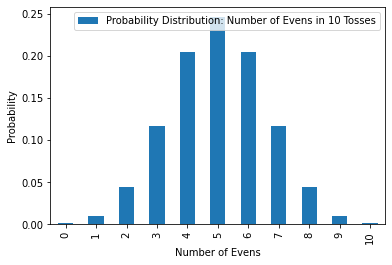

In [ ]:
def binomial_prob(n, p, j):
  n_choose_j = np.math.factorial(n)/(np.math.factorial(j)*np.math.factorial(n-j))
  return  n_choose_j*p**j*(1-p)**(n-j)

binomial_list =[]
n=10
p=0.5
for i in range(0,11):
  binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of Evens in 10 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar();
plt.xlabel('Number of Evens')
plt.ylabel("Probability");

Notice that the graph looks symmetric around 5. In fact, the shape of the graph is dependent on $p$, the probability of success. The closer $p$ is to $0.5$ the more symmetric it will be. Suppose we are instead interested in rolling the number 2 on a six-sided die. Here 'success' is rolling a 2, and 'failure' is rolling anything else. Thus, $p=\frac{1}{6}$. Below we see the probability distribution of this example.

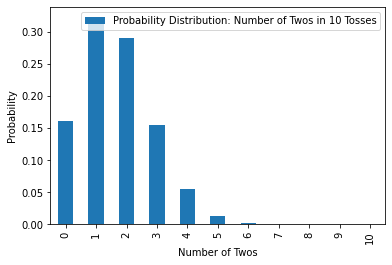

In [ ]:
binomial_list =[]
n=10
p=1/6
for i in range(0,11):
  binomial_list.append(binomial_prob(n, p, i))

legend = f'Probability Distribution: Number of Twos in 10 Tosses'

pd.DataFrame({legend: binomial_list}).plot.bar();
plt.xlabel('Number of Twos')
plt.ylabel("Probability");

Here we see the peak of the distribution lies around 1. With a success probability of $\frac{1}{6}$, on average we should see about 1.6 twos in 10 tosses. Therefore a peak between 1 and 2 makes sense!

What we just calculated was the mean of our binomial distribution, 1.6. We calculated it by multiplying the probability of success by the number of trials. In general, we can calculate the mean by drawing a sample and taking the mean empirically, or computing it based on the expected value.
For given parameters $n$, and $p$, the formula for the mean of a binomial distribution is $E(X) = \mu(X) = n*p$. We can also calculate the standard deviation of the binomial distribution using $\sigma(X) = \sqrt{n*p*(1-p)}$. Evaluating this equation we see that the standard deviation of the binomial distribution with $n = 10$ and $p = \frac{1}{6}$ is: 


In [ ]:
np.sqrt(10*(1/6)*(1-(1/6)))

1.1785113019775793